<a href="https://colab.research.google.com/github/Alf-caput/NFL2022_TacklePredictNN/blob/dev3/new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import gdown

id = '1V_fIjH-WGHTVgyRkdNFkZ6XxiqDoaMrA'
folder = 'nfl-big-data-bowl-2024'
endpoint = '.zip'

url = f'https://drive.google.com/uc?id={id}'

output = folder + endpoint

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1V_fIjH-WGHTVgyRkdNFkZ6XxiqDoaMrA
To: /content/nfl-big-data-bowl-2024.zip
100%|██████████| 293M/293M [00:01<00:00, 246MB/s]


'nfl-big-data-bowl-2024.zip'

In [13]:
from zipfile import ZipFile

with ZipFile(output, 'r') as zObject:
	zObject.extractall(folder)

In [14]:
import pandas as pd
import os

csv_files = [file for file in os.listdir(folder) if file.endswith('.csv')]
csv_files.sort()

In [15]:
print(csv_files)

['games.csv', 'players.csv', 'plays.csv', 'tackles.csv', 'tracking_week_1.csv', 'tracking_week_2.csv', 'tracking_week_3.csv', 'tracking_week_4.csv', 'tracking_week_5.csv', 'tracking_week_6.csv', 'tracking_week_7.csv', 'tracking_week_8.csv', 'tracking_week_9.csv']


Dentro de la carpeta nfl-big-data-bowl-2024 se encuentran los csv que utilizaremos, a continuación creamos un diccionario para facilitarnos el acceso a los diferentes dataframes (dfs).

In [16]:
dfs = {os.path.splitext(file)[0]: pd.read_csv(os.path.join(folder, file)) for file in csv_files}

In [17]:
dfs['tackles'].head(10)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
5,2022090800,1286,44976,1,0,0,0
6,2022090800,1736,44976,1,0,0,0
7,2022090800,2860,46085,1,0,0,0
8,2022090800,3092,46190,1,0,0,0
9,2022090800,3145,52647,1,0,0,0


In [18]:
dfs['games'].head(10)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
5,2022091104,2022,1,09/11/2022,13:00:00,DET,PHI,35,38
6,2022091105,2022,1,09/11/2022,13:00:00,HOU,IND,20,20
7,2022091106,2022,1,09/11/2022,13:00:00,MIA,NE,20,7
8,2022091107,2022,1,09/11/2022,13:00:00,NYJ,BAL,9,24
9,2022091109,2022,1,09/11/2022,13:00:00,WAS,JAX,28,22


In [19]:
dfs['tracking_week_1'].head(3)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN


In [20]:
dfs['tackles'].head(10)

,gameId,playId,nflId,tackle,assist,forcedFumble,pff_missedTackle
0,2022090800,101,42816,1,0,0,0
1,2022090800,393,46232,1,0,0,0
2,2022090800,486,40166,1,0,0,0
3,2022090800,646,47939,1,0,0,0
4,2022090800,818,40107,1,0,0,0
5,2022090800,1286,44976,1,0,0,0
6,2022090800,1736,44976,1,0,0,0
7,2022090800,2860,46085,1,0,0,0
8,2022090800,3092,46190,1,0,0,0
9,2022090800,3145,52647,1,0,0,0


In [21]:
dfs['players'].head(10)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
5,33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco
6,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson
8,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell
9,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne


## AQUÍ ESTÁ LO NUEVO

Introducimos una nueva columna llamada 'position' en el conjunto de datos de tracking_week_1 para asignar la posición correspondiente a cada jugador. Esta adición nos permite asociar de manera más directa la posición de cada jugador en el campo

In [22]:
import pandas as pd
# pd.merge se emplea para combinar dos dataframes.
# utilizamos left join, es decir conservamos todos los datos de tracking_week_1 y añadimos la columna de players(position).
# left,right_on='nflId', se utiliza como union de los dataframes.
merged_df = pd.merge(dfs['tracking_week_1'], dfs['players'], how='left', left_on='nflId', right_on='nflId')
#creamos la nueva columna llamada position
dfs['tracking_week_1']['position'] = merged_df['position']


In [54]:
dfs['games'].head(10)

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
0,2022090800,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
1,2022091100,2022,1,09/11/2022,13:00:00,ATL,NO,26,27
2,2022091101,2022,1,09/11/2022,13:00:00,CAR,CLE,24,26
3,2022091102,2022,1,09/11/2022,13:00:00,CHI,SF,19,10
4,2022091103,2022,1,09/11/2022,13:00:00,CIN,PIT,20,23
5,2022091104,2022,1,09/11/2022,13:00:00,DET,PHI,35,38
6,2022091105,2022,1,09/11/2022,13:00:00,HOU,IND,20,20
7,2022091106,2022,1,09/11/2022,13:00:00,MIA,NE,20,7
8,2022091107,2022,1,09/11/2022,13:00:00,NYJ,BAL,9,24
9,2022091109,2022,1,09/11/2022,13:00:00,WAS,JAX,28,22


In [23]:
merged_df = pd.merge(dfs['tracking_week_1'], dfs['tackles'], how='left', left_on='nflId', right_on='nflId')
#creamos la nueva columna llamada position
dfs['tracking_week_1']['tackle'] = merged_df['tackle']

In [24]:
dfs['tracking_week_1']['tackle']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1407434    0.0
1407435    0.0
1407436    0.0
1407437    0.0
1407438    0.0
Name: tackle, Length: 1407439, dtype: float64

In [25]:
dfs['tracking_week_1'].head(400)

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position,tackle
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.37,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.47,27.13,1.67,0.61,0.17,230.98,148.53,pass_arrived,G,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.56,27.01,1.57,0.49,0.15,230.98,147.05,NaN,G,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.64,26.90,1.44,0.89,0.14,232.38,145.42,NaN,G,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.72,26.80,1.29,1.24,0.13,233.36,141.95,NaN,G,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022090800,56,48512.0,Ryan Bates,22,2022-09-08 20:24:07.299999,71.0,BUF,left,88.23,30.87,2.29,1.00,0.23,288.48,277.73,NaN,C,0.0
396,2022090800,56,52536.0,Gabe Davis,1,2022-09-08 20:24:05.200000,13.0,BUF,left,74.35,7.14,7.91,0.79,0.79,269.06,260.37,NaN,WR,0.0
397,2022090800,56,52536.0,Gabe Davis,2,2022-09-08 20:24:05.299999,13.0,BUF,left,73.56,7.01,7.97,0.81,0.80,275.68,259.74,pass_arrived,WR,0.0
398,2022090800,56,52536.0,Gabe Davis,3,2022-09-08 20:24:05.400000,13.0,BUF,left,72.78,6.86,7.94,0.78,0.80,281.71,259.50,NaN,WR,0.0


In [26]:
game_ids = dfs['tracking_week_1']['gameId'].unique()
frame_ids = dfs['tracking_week_1']['frameId'].unique()
print(frame_ids)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114]


In [27]:
df = dfs['tracking_week_1']
snapshot = df[df['time'] == df['time'][0]]
snapshot

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position,tackle
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.620000,1.15,0.16,231.74,147.90,NaN,G,NaN
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.250000,27.530000,1.240000,3.81,0.11,4.20,331.67,NaN,ILB,1.0
44,2022090800,56,41239.0,Aaron Donald,1,2022-09-08 20:24:05.200000,99.0,LA,left,91.080000,31.610000,3.910000,2.34,0.40,168.33,132.02,NaN,DT,1.0
66,2022090800,56,42392.0,Mitch Morse,1,2022-09-08 20:24:05.200000,60.0,BUF,left,88.250000,28.740000,0.670000,1.97,0.07,244.21,30.29,NaN,C,0.0
88,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.200000,14.0,BUF,left,80.600000,38.290000,6.230000,0.90,0.62,140.05,189.38,NaN,WR,1.0
110,2022090800,56,42816.0,Troy Hill,1,2022-09-08 20:24:05.200000,2.0,LA,left,72.340000,7.810000,4.360000,0.91,0.43,338.33,257.23,NaN,CB,1.0
132,2022090800,56,43294.0,Jalen Ramsey,1,2022-09-08 20:24:05.200000,5.0,LA,left,77.950000,40.780000,5.500000,3.00,0.54,139.54,172.50,NaN,CB,0.0
154,2022090800,56,43298.0,Leonard Floyd,1,2022-09-08 20:24:05.200000,54.0,LA,left,91.990000,33.780000,1.860000,4.76,0.20,155.94,136.01,NaN,DE,1.0
176,2022090800,56,43335.0,A'Shawn Robinson,1,2022-09-08 20:24:05.200000,94.0,LA,left,88.510000,25.470000,1.090000,2.88,0.10,13.98,43.43,NaN,DT,1.0
198,2022090800,56,44875.0,Dion Dawkins,1,2022-09-08 20:24:05.200000,73.0,BUF,left,89.420000,25.810000,1.890000,2.47,0.18,242.67,65.25,NaN,T,0.0


In [28]:
df = dfs['tracking_week_1']
snapshot2 = df[df['frameId'] == frame_ids[0]]
snapshot2

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position,tackle
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.27,1.62,1.15,0.16,231.74,147.90,NaN,G,NaN
22,2022090800,56,38577.0,Bobby Wagner,1,2022-09-08 20:24:05.200000,45.0,LA,left,78.250000,27.53,1.24,3.81,0.11,4.20,331.67,NaN,ILB,1.0
44,2022090800,56,41239.0,Aaron Donald,1,2022-09-08 20:24:05.200000,99.0,LA,left,91.080000,31.61,3.91,2.34,0.40,168.33,132.02,NaN,DT,1.0
66,2022090800,56,42392.0,Mitch Morse,1,2022-09-08 20:24:05.200000,60.0,BUF,left,88.250000,28.74,0.67,1.97,0.07,244.21,30.29,NaN,C,0.0
88,2022090800,56,42489.0,Stefon Diggs,1,2022-09-08 20:24:05.200000,14.0,BUF,left,80.600000,38.29,6.23,0.90,0.62,140.05,189.38,NaN,WR,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407174,2022091200,3826,52526.0,Albert Okwuegbunam,1,2022-09-12 23:05:53.000000,85.0,DEN,left,52.930000,31.24,1.77,3.05,0.18,130.67,202.72,NaN,TE,1.0
1407227,2022091200,3826,53464.0,Javonte Williams,1,2022-09-12 23:05:53.000000,33.0,DEN,left,70.710000,13.90,4.01,1.45,0.41,8.68,178.63,NaN,RB,1.0
1407280,2022091200,3826,54505.0,Boye Mafe,1,2022-09-12 23:05:53.000000,53.0,SEA,left,71.480000,27.14,3.44,2.86,0.34,152.49,165.18,NaN,OLB,1.0
1407333,2022091200,3826,54618.0,Tariq Woolen,1,2022-09-12 23:05:53.000000,27.0,SEA,left,53.280000,15.53,5.45,2.33,0.55,315.69,280.04,NaN,CB,1.0


In [29]:
clubs = snapshot['club'].unique()
clubs

array(['BUF', 'LA', 'football'], dtype=object)

In [30]:
df = dfs['tracking_week_1']
df[df['gameId'] == game_ids[0]]

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position,tackle
0,2022090800,56,35472.0,Rodger Saffold,1,2022-09-08 20:24:05.200000,76.0,BUF,left,88.370000,27.270000,1.62,1.15,0.16,231.74,147.90,NaN,G,NaN
1,2022090800,56,35472.0,Rodger Saffold,2,2022-09-08 20:24:05.299999,76.0,BUF,left,88.470000,27.130000,1.67,0.61,0.17,230.98,148.53,pass_arrived,G,NaN
2,2022090800,56,35472.0,Rodger Saffold,3,2022-09-08 20:24:05.400000,76.0,BUF,left,88.560000,27.010000,1.57,0.49,0.15,230.98,147.05,NaN,G,NaN
3,2022090800,56,35472.0,Rodger Saffold,4,2022-09-08 20:24:05.500000,76.0,BUF,left,88.640000,26.900000,1.44,0.89,0.14,232.38,145.42,NaN,G,NaN
4,2022090800,56,35472.0,Rodger Saffold,5,2022-09-08 20:24:05.599999,76.0,BUF,left,88.720000,26.800000,1.29,1.24,0.13,233.36,141.95,NaN,G,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79207,2022090800,3636,NaN,football,36,2022-09-08 23:05:27.099999,NaN,football,left,26.309999,28.690001,1.55,3.77,0.17,NaN,NaN,tackle,NaN,1.0
79208,2022090800,3636,NaN,football,37,2022-09-08 23:05:27.200000,NaN,football,left,26.209999,28.799999,1.23,3.14,0.15,NaN,NaN,NaN,NaN,1.0
79209,2022090800,3636,NaN,football,38,2022-09-08 23:05:27.299999,NaN,football,left,26.160000,28.959999,1.03,2.58,0.17,NaN,NaN,NaN,NaN,1.0
79210,2022090800,3636,NaN,football,39,2022-09-08 23:05:27.400000,NaN,football,left,26.139999,29.190001,0.95,2.30,0.23,NaN,NaN,NaN,NaN,1.0


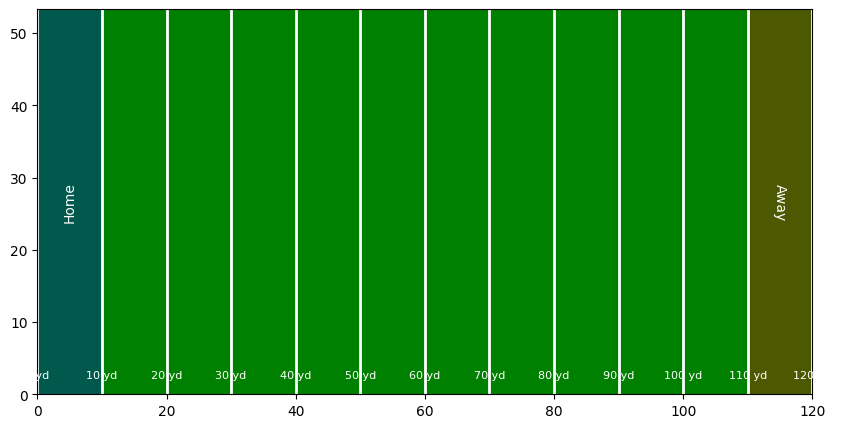

In [31]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('green')
plt.xlim(0, 120)
plt.ylim(0, 53.3)

# representacion yrds
for yard_line in range(0, 130, 10):
    color = 'white' if yard_line % 10 == 0 else 'green'
    plt.axvline(x=yard_line, color=color, linestyle='-', linewidth=2)
    plt.text(yard_line, 2, f'{yard_line} yd', color='white', ha='center', va='bottom', fontsize=8)

#home y away
plt.axvspan(0, 10, facecolor='blue', alpha=0.3)
plt.axvspan(110, 120, facecolor='red', alpha=0.3)
plt.text(5, 26.7, 'Home', color='white', ha='center', va='center', fontsize=10, rotation=90)
plt.text(115, 26.7, 'Away', color='white', ha='center', va='center', fontsize=10, rotation=-90)


plt.show()


In [32]:
serie = pd.Series(dfs['tracking_week_1']['tackle'])

# Cuenta el número de elementos en cada clase
conteo = serie.value_counts(dropna=False)

In [33]:
dfs2=dfs['tracking_week_1'].dropna()

In [34]:
dfs2

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,y,s,a,dis,o,dir,event,position,tackle
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,78.20,27.69,1.78,4.43,0.16,357.21,346.31,pass_arrived,ILB,1.0
27,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,pass_outcome_caught,ILB,1.0
39,2022090800,56,38577.0,Bobby Wagner,18,2022-09-08 20:24:06.900000,45.0,LA,left,78.62,32.31,1.76,3.13,0.19,0.84,34.12,tackle,ILB,1.0
45,2022090800,56,41239.0,Aaron Donald,2,2022-09-08 20:24:05.299999,99.0,LA,left,91.36,31.32,3.93,2.21,0.40,178.20,136.28,pass_arrived,DT,1.0
49,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,pass_outcome_caught,DT,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407328,2022091200,3826,54505.0,Boye Mafe,49,2022-09-12 23:05:57.799999,53.0,SEA,left,56.73,7.82,0.98,2.21,0.11,17.90,340.05,tackle,OLB,0.0
1407336,2022091200,3826,54618.0,Tariq Woolen,4,2022-09-12 23:05:53.299999,27.0,SEA,left,51.89,15.86,4.13,4.43,0.43,326.74,288.01,pass_arrived,CB,1.0
1407338,2022091200,3826,54618.0,Tariq Woolen,6,2022-09-12 23:05:53.500000,27.0,SEA,left,51.22,16.13,3.22,4.63,0.34,335.44,296.50,pass_outcome_caught,CB,1.0
1407356,2022091200,3826,54618.0,Tariq Woolen,24,2022-09-12 23:05:55.299999,27.0,SEA,left,48.19,13.00,4.86,1.28,0.49,181.29,195.61,first_contact,CB,0.0


In [35]:
dfs2_drop= dfs2.drop(['gameId', 'playId','nflId','displayName','frameId','time','club','event','jerseyNumber'], axis=1)

In [36]:
dfs2_drop

,playDirection,x,y,s,a,dis,o,dir,position,tackle
23,left,78.20,27.69,1.78,4.43,0.16,357.21,346.31,ILB,1.0
27,left,78.11,28.74,3.35,2.62,0.32,349.47,357.71,ILB,1.0
39,left,78.62,32.31,1.76,3.13,0.19,0.84,34.12,ILB,1.0
45,left,91.36,31.32,3.93,2.21,0.40,178.20,136.28,DT,1.0
49,left,92.15,29.96,3.62,2.86,0.37,186.16,157.65,DT,1.0
...,...,...,...,...,...,...,...,...,...,...
1407328,left,56.73,7.82,0.98,2.21,0.11,17.90,340.05,OLB,0.0
1407336,left,51.89,15.86,4.13,4.43,0.43,326.74,288.01,CB,1.0
1407338,left,51.22,16.13,3.22,4.63,0.34,335.44,296.50,CB,1.0
1407356,left,48.19,13.00,4.86,1.28,0.49,181.29,195.61,CB,0.0


In [37]:
from sklearn.preprocessing import normalize
import pandas as pd

dfs2_drop_encoded = pd.get_dummies(dfs2_drop.select_dtypes(include=['object']))



In [38]:
dfs2_drop_encoded = pd.concat([dfs2_drop.select_dtypes(exclude=['object']), dfs2_drop_encoded], axis=1)

# Verificar el resultado


In [39]:
dfs2_drop_encoded

,x,y,s,a,dis,o,dir,tackle,playDirection_left,playDirection_right,...,position_ILB,position_MLB,position_NT,position_OLB,position_QB,position_RB,position_SS,position_T,position_TE,position_WR
23,78.20,27.69,1.78,4.43,0.16,357.21,346.31,1.0,1,0,...,1,0,0,0,0,0,0,0,0,0
27,78.11,28.74,3.35,2.62,0.32,349.47,357.71,1.0,1,0,...,1,0,0,0,0,0,0,0,0,0
39,78.62,32.31,1.76,3.13,0.19,0.84,34.12,1.0,1,0,...,1,0,0,0,0,0,0,0,0,0
45,91.36,31.32,3.93,2.21,0.40,178.20,136.28,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
49,92.15,29.96,3.62,2.86,0.37,186.16,157.65,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407328,56.73,7.82,0.98,2.21,0.11,17.90,340.05,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1407336,51.89,15.86,4.13,4.43,0.43,326.74,288.01,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1407338,51.22,16.13,3.22,4.63,0.34,335.44,296.50,1.0,1,0,...,0,0,0,0,0,0,0,0,0,0
1407356,48.19,13.00,4.86,1.28,0.49,181.29,195.61,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalizar la columna "x" del DataFrame
dfs2_drop_encoded['x'] = scaler.fit_transform(dfs2_drop_encoded[['x']])

# Normalizar la columna "y" del DataFrame
dfs2_drop_encoded['y'] = scaler.fit_transform(dfs2_drop_encoded[['y']])
# Normalizar la columna "y" del DataFrame
dfs2_drop_encoded['s'] = scaler.fit_transform(dfs2_drop_encoded[['s']])
dfs2_drop_encoded['a'] = scaler.fit_transform(dfs2_drop_encoded[['a']])
dfs2_drop_encoded['dis'] = scaler.fit_transform(dfs2_drop_encoded[['dis']])
dfs2_drop_encoded['o'] = scaler.fit_transform(dfs2_drop_encoded[['o']])
dfs2_drop_encoded['dir'] = scaler.fit_transform(dfs2_drop_encoded[['dir']])


In [41]:
dfs2_drop_encoded['tackle']

23         1.0
27         1.0
39         1.0
45         1.0
49         1.0
          ... 
1407328    0.0
1407336    1.0
1407338    1.0
1407356    0.0
1407381    0.0
Name: tackle, Length: 120284, dtype: float64

In [42]:
X = dfs2_drop_encoded.drop('tackle', axis=1)
Y = dfs2_drop_encoded['tackle']

In [43]:
X

,x,y,s,a,dis,o,dir,playDirection_left,playDirection_right,position_C,...,position_ILB,position_MLB,position_NT,position_OLB,position_QB,position_RB,position_SS,position_T,position_TE,position_WR
23,0.650446,0.512558,0.139063,0.238044,0.061069,0.992250,0.961972,1,0,0,...,1,0,0,0,0,0,0,0,0,0
27,0.649696,0.529907,0.261719,0.140785,0.122137,0.970750,0.993639,1,0,0,...,1,0,0,0,0,0,0,0,0,0
39,0.653946,0.588896,0.137500,0.168189,0.072519,0.002333,0.094778,1,0,0,...,1,0,0,0,0,0,0,0,0,0
45,0.760103,0.572538,0.307031,0.118753,0.152672,0.495000,0.378556,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49,0.766686,0.550066,0.282813,0.153681,0.141221,0.517111,0.437917,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407328,0.471544,0.184237,0.076563,0.118753,0.041985,0.049722,0.944583,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1407336,0.431214,0.317085,0.322656,0.238044,0.164122,0.907611,0.800028,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1407338,0.425631,0.321547,0.251563,0.248791,0.129771,0.931778,0.823611,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1407356,0.400383,0.269828,0.379688,0.068780,0.187023,0.503583,0.543361,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
Y

23         1.0
27         1.0
39         1.0
45         1.0
49         1.0
          ... 
1407328    0.0
1407336    1.0
1407338    1.0
1407356    0.0
1407381    0.0
Name: tackle, Length: 120284, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=82)

In [46]:
print("Tamaño del conjunto de entrenamiento: ", len(X_train))
print("Tamaño del conjunto de prueba: ", len(X_test))

Tamaño del conjunto de entrenamiento:  96227
Tamaño del conjunto de prueba:  24057


In [47]:
from keras.models import Sequential
from keras.layers import Dense

# Crear el modelo de la red neuronal
model = Sequential()
model.add(Dense(5000, input_dim=len(X_train.columns), activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, Y_train, epochs=30, batch_size=64,validation_data=(X_test, Y_test))

# Evaluar el modelo
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/30
1504/1504 [==============================] - 9s 4ms/step - loss: 0.6871 - accuracy: 0.5576 - val_loss: 0.6863 - val_accuracy: 0.5588
Epoch 2/30
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6863 - accuracy: 0.5589 - val_loss: 0.6864 - val_accuracy: 0.5588
Epoch 3/30
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6864 - accuracy: 0.5589 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 4/30
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6864 - accuracy: 0.5589 - val_loss: 0.6863 - val_accuracy: 0.5588
Epoch 5/30
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6863 - accuracy: 0.5589 - val_loss: 0.6864 - val_accuracy: 0.5588
Epoch 6/30
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6862 - accuracy: 0.5589 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 7/30
1504/1504 [==============================] - 6s 4ms/step - loss: 0.6861 - accuracy: 0.5589 - val_loss: 0.6861 - val_accuracy:

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
# Crear el modelo
modelo = Sequential()

# Agregar capas al modelo
modelo.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))
modelo.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo

optimizer = Adam(lr=0.001)  # ajusta el valor de lr según lo que funcione mejor
modelo.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Entrenar el modelo
modelo.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluar el modelo en el conjunto de prueba
puntuacion = modelo.evaluate(X_test, Y_test)
print(f"Pérdida: {puntuacion[0]}, Precisión: {puntuacion[1]}")


Epoch 1/10
3008/3008 [==============================] - 11s 4ms/step - loss: 0.6873 - accuracy: 0.5583 - val_loss: 0.6869 - val_accuracy: 0.5588
Epoch 2/10
3008/3008 [==============================] - 10s 3ms/step - loss: 0.6866 - accuracy: 0.5589 - val_loss: 0.6864 - val_accuracy: 0.5588
Epoch 3/10
3008/3008 [==============================] - 11s 4ms/step - loss: 0.6864 - accuracy: 0.5589 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 4/10
3008/3008 [==============================] - 11s 4ms/step - loss: 0.6862 - accuracy: 0.5590 - val_loss: 0.6864 - val_accuracy: 0.5588
Epoch 5/10
3008/3008 [==============================] - 11s 4ms/step - loss: 0.6861 - accuracy: 0.5588 - val_loss: 0.6862 - val_accuracy: 0.5588
Epoch 6/10
3008/3008 [==============================] - 11s 4ms/step - loss: 0.6859 - accuracy: 0.5590 - val_loss: 0.6864 - val_accuracy: 0.5579
Epoch 7/10
3008/3008 [==============================] - 11s 4ms/step - loss: 0.6858 - accuracy: 0.5591 - val_loss: 0.6866 - val_ac

In [49]:
#modelo=create_baseline

NameError: name 'create_baseline' is not defined

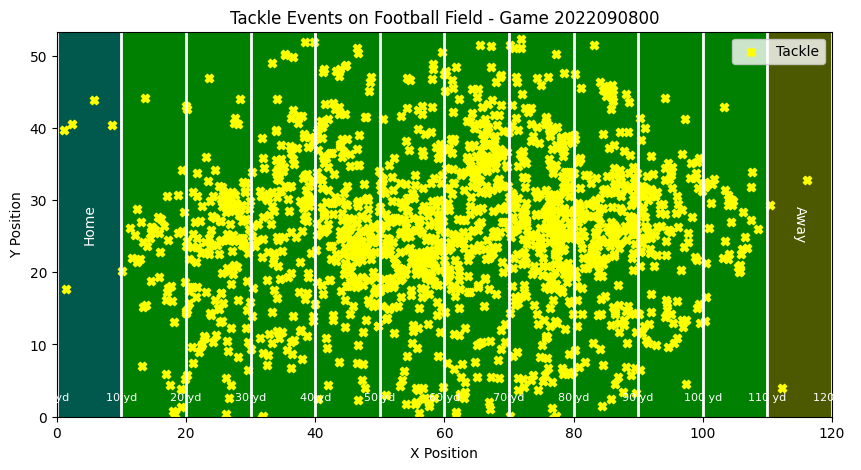

In [52]:
import matplotlib.pyplot as plt

# Supongamos que gameId_to_plot es el ID del partido que te interesa
gameId_to_plot = 2022090800

# Filtrar las filas correspondientes a tackles y al gameId específico
tackle_data = dfs2[(dfs2['event'] == 'tackle') & (dfs2['gameId'] == gameId_to_plot)]

# Crear el campo de fútbol
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('green')
plt.xlim(0, 120)
plt.ylim(0, 53.3)

# Representación yardas
for yard_line in range(0, 130, 10):
    color = 'white' if yard_line % 10 == 0 else 'green'
    plt.axvline(x=yard_line, color=color, linestyle='-', linewidth=2)
    plt.text(yard_line, 2, f'{yard_line} yd', color='white', ha='center', va='bottom', fontsize=8)

# Zonas de home y away
plt.axvspan(0, 10, facecolor='blue', alpha=0.3)
plt.axvspan(110, 120, facecolor='red', alpha=0.3)
plt.text(5, 26.7, 'Home', color='white', ha='center', va='center', fontsize=10, rotation=90)
plt.text(115, 26.7, 'Away', color='white', ha='center', va='center', fontsize=10, rotation=-90)

# Trazar los puntos correspondientes a los tackles
plt.scatter(tackle_data['x'], tackle_data['y'], color='yellow', marker='X', label='Tackle')

# Etiquetas y leyenda
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title(f'Tackle Events on Football Field - Game {gameId_to_plot}')
plt.legend()

# Mostrar el gráfico
plt.show()


In [59]:
print(dfs2.keys())

Index(['gameId', 'playId', 'nflId', 'displayName', 'frameId', 'time',
       'jerseyNumber', 'club', 'playDirection', 'x', 'y', 's', 'a', 'dis', 'o',
       'dir', 'event', 'position', 'tackle'],
      dtype='object')


In [60]:
import pandas as pd

# Suponiendo que dfs['tracking_week_1'] ya está filtrado y dfs['games'] está definido

# Realizar la fusión utilizando 'gameId'
merged_df = pd.merge(dfs['tracking_week_1'], dfs['games'], how='left', on='gameId')

# Crear nuevas columnas
merged_df['homeTeamAbbr'] = merged_df['homeTeamAbbr']
merged_df['visitorTeamAbbr'] = merged_df['visitorTeamAbbr']

# Asegurarse de que el resultado esté filtrado
dfs2 = merged_df.dropna()

# Mostrar los resultados
print(dfs2.head())


        gameId  playId    nflId   displayName  frameId  \
23  2022090800      56  38577.0  Bobby Wagner        2   
27  2022090800      56  38577.0  Bobby Wagner        6   
39  2022090800      56  38577.0  Bobby Wagner       18   
45  2022090800      56  41239.0  Aaron Donald        2   
49  2022090800      56  41239.0  Aaron Donald        6   

                          time  jerseyNumber club playDirection      x  ...  \
23  2022-09-08 20:24:05.299999          45.0   LA          left  78.20  ...   
27  2022-09-08 20:24:05.700000          45.0   LA          left  78.11  ...   
39  2022-09-08 20:24:06.900000          45.0   LA          left  78.62  ...   
45  2022-09-08 20:24:05.299999          99.0   LA          left  91.36  ...   
49  2022-09-08 20:24:05.700000          99.0   LA          left  92.15  ...   

    position  tackle  season  week    gameDate  gameTimeEastern homeTeamAbbr  \
23       ILB     1.0    2022     1  09/08/2022         20:20:00           LA   
27       ILB    

In [61]:
dfs2

,gameId,playId,nflId,displayName,frameId,time,jerseyNumber,club,playDirection,x,...,position,tackle,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr,homeFinalScore,visitorFinalScore
23,2022090800,56,38577.0,Bobby Wagner,2,2022-09-08 20:24:05.299999,45.0,LA,left,78.20,...,ILB,1.0,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
27,2022090800,56,38577.0,Bobby Wagner,6,2022-09-08 20:24:05.700000,45.0,LA,left,78.11,...,ILB,1.0,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
39,2022090800,56,38577.0,Bobby Wagner,18,2022-09-08 20:24:06.900000,45.0,LA,left,78.62,...,ILB,1.0,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
45,2022090800,56,41239.0,Aaron Donald,2,2022-09-08 20:24:05.299999,99.0,LA,left,91.36,...,DT,1.0,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
49,2022090800,56,41239.0,Aaron Donald,6,2022-09-08 20:24:05.700000,99.0,LA,left,92.15,...,DT,1.0,2022,1,09/08/2022,20:20:00,LA,BUF,10,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407328,2022091200,3826,54505.0,Boye Mafe,49,2022-09-12 23:05:57.799999,53.0,SEA,left,56.73,...,OLB,0.0,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16
1407336,2022091200,3826,54618.0,Tariq Woolen,4,2022-09-12 23:05:53.299999,27.0,SEA,left,51.89,...,CB,1.0,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16
1407338,2022091200,3826,54618.0,Tariq Woolen,6,2022-09-12 23:05:53.500000,27.0,SEA,left,51.22,...,CB,1.0,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16
1407356,2022091200,3826,54618.0,Tariq Woolen,24,2022-09-12 23:05:55.299999,27.0,SEA,left,48.19,...,CB,0.0,2022,1,09/12/2022,20:15:00,SEA,DEN,17,16


Ahora veromos los tackles del

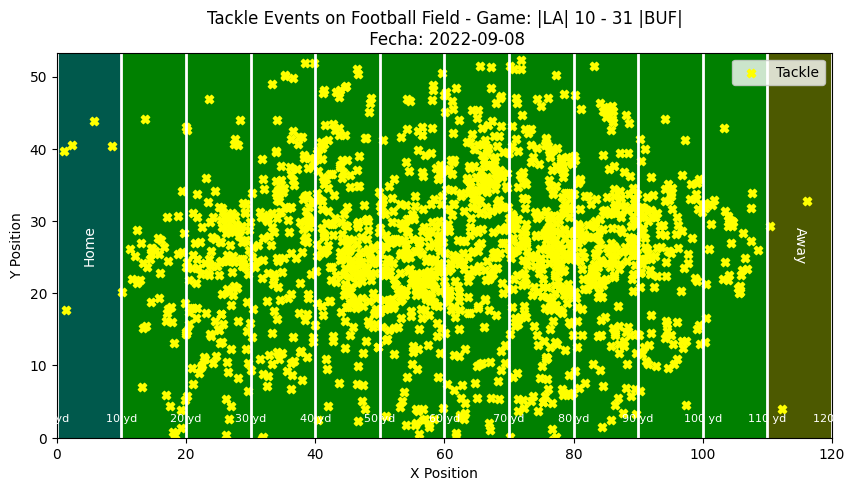

In [87]:
import matplotlib.pyplot as plt

# Supongamos que gameId_to_plot es el ID del partido que te interesa
gameId_to_plot = 2022090800

# Filtrar las filas correspondientes a tackles y al gameId específico
tackle_data = dfs2[(dfs2['event'] == 'tackle') & (dfs2['gameId'] == gameId_to_plot)]

# Obtener nombre completo de los equipos
home_team_name = dfs2[dfs2['gameId'] == gameId_to_plot]['homeTeamAbbr'].iloc[0]
visitor_team_name = dfs2[dfs2['gameId'] == gameId_to_plot]['visitorTeamAbbr'].iloc[0]

# Crear el campo de fútbol
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('green')
plt.xlim(0, 120)
plt.ylim(0, 53.3)

# Representación yardas
for yard_line in range(0, 130, 10):
    color = 'white' if yard_line % 10 == 0 else 'green'
    plt.axvline(x=yard_line, color=color, linestyle='-', linewidth=2)
    plt.text(yard_line, 2, f'{yard_line} yd', color='white', ha='center', va='bottom', fontsize=8)

# Zonas de home y away
plt.axvspan(0, 10, facecolor='blue', alpha=0.3)
plt.axvspan(110, 120, facecolor='red', alpha=0.3)
plt.text(5, 26.7, 'Home', color='white', ha='center', va='center', fontsize=10, rotation=90)
plt.text(115, 26.7, 'Away', color='white', ha='center', va='center', fontsize=10, rotation=-90)

# Trazar los puntos correspondientes a los tackles
plt.scatter(tackle_data['x'], tackle_data['y'], color='yellow', marker='X', label='Tackle')

# Etiquetas y leyenda
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Convertir los puntajes a cadenas
home_score_str = str(tackle_data['homeFinalScore'].iloc[0])
visitor_score_str = str(tackle_data['visitorFinalScore'].iloc[0])
gameDate = str(tackle_data['gameDate'].iloc[0]).split()[0]

# Agregar nombre de los equipos y el resultado al título
plt.title(f'Tackle Events on Football Field - Game: |{home_team_name}| {home_score_str} - {visitor_score_str} |{visitor_team_name}|\n Fecha: {gameDate}')
plt.legend()

# Mostrar el gráfico
plt.show()



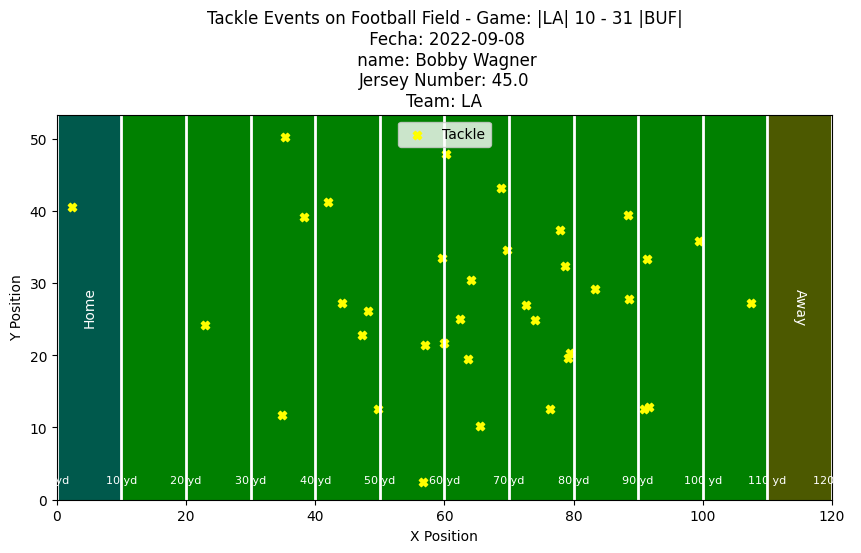

In [86]:
import matplotlib.pyplot as plt

# Supongamos que gameId_to_plot es el ID del partido que te interesa
gameId_to_plot = 2022090800

# Filtrar las filas correspondientes a tackles y al gameId específico
tackle_data = dfs2[(dfs2['event'] == 'tackle') & (dfs2['gameId'] == gameId_to_plot)]

# Obtener nombre completo de los equipos
home_team_name = dfs2[dfs2['gameId'] == gameId_to_plot]['homeTeamAbbr'].iloc[0]
visitor_team_name = dfs2[dfs2['gameId'] == gameId_to_plot]['visitorTeamAbbr'].iloc[0]

# Filtrar solo los tackles del jugador número 45 del equipo local
tackle_data_player_45 = tackle_data[(tackle_data['jerseyNumber'] == 45) & (tackle_data['club'] == home_team_name)]

# Crear el campo de fútbol
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_facecolor('green')
plt.xlim(0, 120)
plt.ylim(0, 53.3)

# Representación yardas
for yard_line in range(0, 130, 10):
    color = 'white' if yard_line % 10 == 0 else 'green'
    plt.axvline(x=yard_line, color=color, linestyle='-', linewidth=2)
    plt.text(yard_line, 2, f'{yard_line} yd', color='white', ha='center', va='bottom', fontsize=8)

# Zonas de home y away
plt.axvspan(0, 10, facecolor='blue', alpha=0.3)
plt.axvspan(110, 120, facecolor='red', alpha=0.3)
plt.text(5, 26.7, 'Home', color='white', ha='center', va='center', fontsize=10, rotation=90)
plt.text(115, 26.7, 'Away', color='white', ha='center', va='center', fontsize=10, rotation=-90)

# Trazar los puntos correspondientes a los tackles del jugador 45 del equipo local
plt.scatter(tackle_data_player_45['x'], tackle_data_player_45['y'], color='yellow', marker='X', label='Tackle')

# Etiquetas y leyenda
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Convertir los puntajes a cadenas
home_score_str = str(tackle_data['homeFinalScore'].iloc[0])
visitor_score_str = str(tackle_data['visitorFinalScore'].iloc[0])
gameDate = str(tackle_data['gameDate'].iloc[0]).split()[0]
# Agregar nombre de los equipos y el resultado al título
plt.title(f'Tackle Events on Football Field - Game: |{home_team_name}| {home_score_str} - {visitor_score_str} |{visitor_team_name}|\n Fecha: {gameDate}\n name: {tackle_data_player_45["displayName"].iloc[0]}\nJersey Number: {tackle_data_player_45["jerseyNumber"].iloc[0]}\nTeam: {home_team_name}')
plt.legend()

# Mostrar el gráfico
plt.show()
